In [24]:
import numpy as np
import pandas as pd
import os,math
import matplotlib.pyplot as plt
import re
%matplotlib inline

**Data**. 
Frist read the data and prepare it for the proyect.

In [25]:
#The data
corpus_root = 'data/coins/'

coins = list()
coins_names = list()
for coin_file in os.listdir(corpus_root):
   print(coin_file)
   coins_names.append(coin_file.split('.')[0])
   coins.append(pd.read_csv(os.path.join(corpus_root,coin_file)))


Aave.csv
algorand.csv
Ankr.csv
Arweave.csv
avalanche.csv
Axie Infinity.csv
Basic Attention Token.csv
binance coin.csv
bitcoin cash.csv
Bitcoin SV.csv
bitcoin.csv
cardano.csv
Celo.csv
chainlink.csv
Chiliz.csv
Compound.csv
cosmos.csv
crypto.com coin.csv
Curve DAO Token.csv
dai.csv
Dash.csv
decentraland.csv
Decred.csv
dogecoin.csv
elrond.csv
Enjin Coin.csv
EOS.csv
ethereum classic.csv
ethereum.csv
fantom.csv
filecoin.csv
ftx token.csv
Hedera.csv
Horizen.csv
ICON.csv
IOTA.csv
IoTeX.csv
Kadena.csv
Kusama.csv
litecoin.csv
Loopring.csv
Maker.csv
Monero.csv
near protocol.csv
NEM.csv
Neo.csv
OMG Network.csv
PancakeSwap.csv
polkadot.csv
polygon.csv
Qtum.csv
Quant.csv
SHIBA INU.csv
Siacoin.csv
solana.csv
stellar.csv
terra.csv
tether.csv
tezos.csv
the graph.csv
The Sandbox.csv
Theta Fuel.csv
theta.csv
THORChain.csv
tron.csv
TrueUSD.csv
uniswap.csv
usd coin.csv
vechain.csv
Voyager Token.csv
Waves.csv
WAX.csv
wrapped bitcoin.csv
xrp.csv
Zcash.csv


In [26]:
leaderboard = pd.read_csv('data/leaderboard/Current Crypto leaderboard.csv')
leaderboard = leaderboard.head(10)
leaderboard

,Rank,Name,Symbol,Price (USD),Market Cap,Vol (24H),Total Vol,Chg (24H),Chg (7D),Dataset Availability
0,1,Bitcoin,BTC,58543.000000,$1.12T,$37.89B,29.37%,2.47%,3.16%,True
1,2,Ethereum,ETH,4682.280000,$559.27B,$26.12B,20.24%,8.01%,9.91%,True
2,3,Binance Coin,BNB,628.820000,$105.79B,$2.65B,2.05%,1.62%,6.52%,True
3,4,Tether,USDT,1.000900,$73.27B,$85.51B,66.27%,0.01%,-0.05%,True
4,5,Solana,SOL,215.530000,$66.17B,$2.59B,2.00%,4.18%,0.34%,True
5,6,Cardano,ADA,1.609100,$54.01B,$1.98B,1.54%,2.57%,-9.35%,True
6,7,XRP,XRP,1.022450,$48.58B,$3.13B,2.43%,4.73%,-2.13%,True
7,8,USD Coin,USDC,0.999300,$38.64B,$5.04B,3.90%,-0.02%,-0.13%,True
8,9,Polkadot,DOT,38.412000,$38.32B,$1.46B,1.13%,6.82%,-4.31%,True
9,10,Dogecoin,DOGE,0.221496,$29.57B,$2.00B,1.55%,2.96%,-2.93%,True


In [27]:
coins[0].head(100)

,Date,Open,High,Low,Close,Volume,Currency
0,2020-10-05,0.528101,0.528101,0.528101,0.528101,879.0,USD
1,2020-10-06,0.528101,0.528101,0.528101,0.528101,879.0,USD
2,2020-10-07,0.528101,0.528101,0.528101,0.528101,879.0,USD
3,2020-10-08,0.528101,0.528101,0.528101,0.528101,879.0,USD
4,2020-10-10,46.818146,51.405655,46.703327,49.133717,1074627.0,USD
...,...,...,...,...,...,...,...
95,2021-06-15,319.400604,326.900909,308.366943,319.757294,352145487.0,USD
96,2021-06-16,311.928223,313.738556,287.531158,290.268494,192278220.0,USD
97,2021-06-17,290.296387,305.388519,285.459717,292.914612,146151226.0,USD
98,2021-06-18,293.533905,293.784607,253.611221,264.352081,229941835.0,USD


In [28]:
print(coins_names)

['Aave', 'algorand', 'Ankr', 'Arweave', 'avalanche', 'Axie Infinity', 'Basic Attention Token', 'binance coin', 'bitcoin cash', 'Bitcoin SV', 'bitcoin', 'cardano', 'Celo', 'chainlink', 'Chiliz', 'Compound', 'cosmos', 'crypto', 'Curve DAO Token', 'dai', 'Dash', 'decentraland', 'Decred', 'dogecoin', 'elrond', 'Enjin Coin', 'EOS', 'ethereum classic', 'ethereum', 'fantom', 'filecoin', 'ftx token', 'Hedera', 'Horizen', 'ICON', 'IOTA', 'IoTeX', 'Kadena', 'Kusama', 'litecoin', 'Loopring', 'Maker', 'Monero', 'near protocol', 'NEM', 'Neo', 'OMG Network', 'PancakeSwap', 'polkadot', 'polygon', 'Qtum', 'Quant', 'SHIBA INU', 'Siacoin', 'solana', 'stellar', 'terra', 'tether', 'tezos', 'the graph', 'The Sandbox', 'Theta Fuel', 'theta', 'THORChain', 'tron', 'TrueUSD', 'uniswap', 'usd coin', 'vechain', 'Voyager Token', 'Waves', 'WAX', 'wrapped bitcoin', 'xrp', 'Zcash']


We add a name column to each data frame to identify the coin we are working with

In [29]:
for index,element in enumerate(coins, start=0):
    element['Name'] = coins_names[index]
coins[1].head(100)

,Date,Open,High,Low,Close,Volume,Currency,Name
0,2019-07-25,0.5983,0.6148,0.5860,0.6102,4753925,USD,algorand
1,2019-07-26,0.6103,0.7111,0.5940,0.6503,8947342,USD,algorand
2,2019-07-27,0.6501,0.6673,0.5728,0.5788,9094853,USD,algorand
3,2019-07-28,0.5788,0.5992,0.5584,0.5759,11048324,USD,algorand
4,2019-07-29,0.5770,0.5934,0.5546,0.5710,11034328,USD,algorand
...,...,...,...,...,...,...,...,...
95,2019-10-28,0.2177,0.2397,0.2177,0.2303,2272452,USD,algorand
96,2019-10-29,0.2304,0.2347,0.2218,0.2263,1629597,USD,algorand
97,2019-10-30,0.2263,0.2266,0.2074,0.2109,1533512,USD,algorand
98,2019-10-31,0.2110,0.2230,0.2076,0.2224,1547526,USD,algorand


Get top 10 coins according to leaderboard.csv

In [30]:

top_10 = list()
index_list = list()
for index,element in enumerate(coins_names, start=0):
    if leaderboard['Name'].str.contains(element,flags=re.IGNORECASE).any():
        i = leaderboard[leaderboard['Name'].apply(lambda x: x.upper() == element.upper())]
        top_10.append(coins[index])
        index_list.append(int(i['Rank']))


top_10 = [x for _, x in sorted(zip(index_list, top_10))]

top_10


[            Date     Open     High      Low    Close  Volume Currency     Name
 0     2010-07-18      0.0      0.1      0.1      0.1      75      USD  bitcoin
 1     2010-07-19      0.1      0.1      0.1      0.1     574      USD  bitcoin
 2     2010-07-20      0.1      0.1      0.1      0.1     262      USD  bitcoin
 3     2010-07-21      0.1      0.1      0.1      0.1     575      USD  bitcoin
 4     2010-07-22      0.1      0.1      0.1      0.1    2160      USD  bitcoin
 ...          ...      ...      ...      ...      ...     ...      ...      ...
 4149  2021-11-26  58937.3  59151.1  53533.5  53730.9  104034      USD  bitcoin
 4150  2021-11-27  53747.2  55280.3  53654.3  54765.9   40706      USD  bitcoin
 4151  2021-11-28  54758.0  57392.3  53448.3  57291.5   49283      USD  bitcoin
 4152  2021-11-29  57288.1  58855.2  56726.7  57794.8   58647      USD  bitcoin
 4153  2021-11-30  57795.2  59174.4  55936.9  58524.6   70607      USD  bitcoin
 
 [4154 rows x 8 columns],
            

NameError: name 'list_coins' is not defined

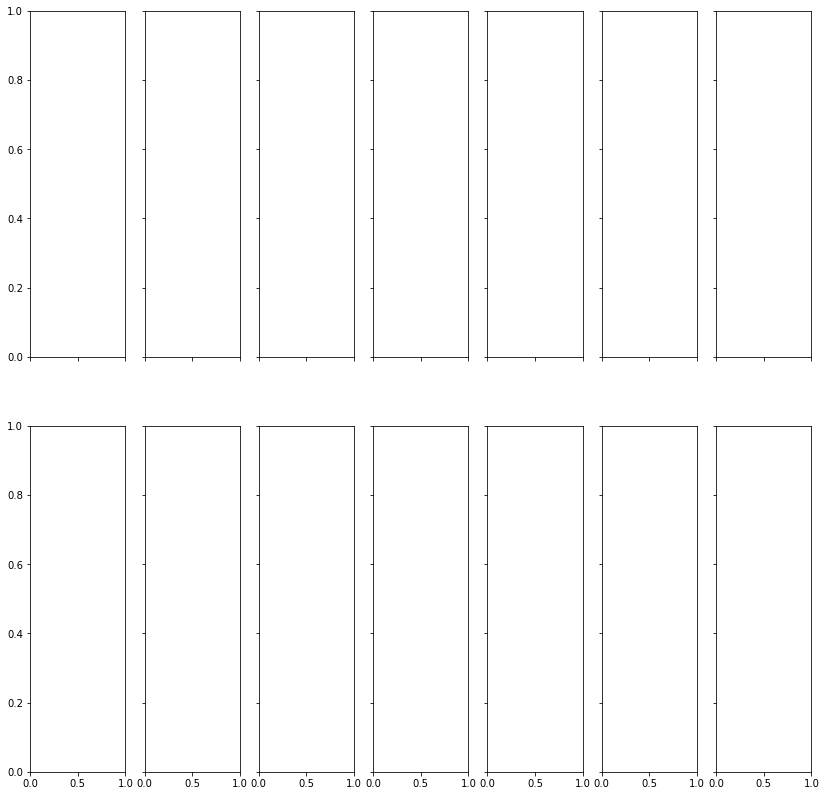

In [31]:
colors=['red','green','blue','yellow','black','cyan','magenta','brown','gray','rosybrown'
        ,'salmon','peachpuff','orange','gold','olive','lime','steelblue','pink','indigo']
COLUMNS = 7
ROWS = math.ceil(10/COLUMNS)
fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(14, 14), sharey=True, sharex=True)

for index,element in enumerate(list_coins, start=0):
    
    current_column = index%COLUMNS
    current_row = index//COLUMNS
    
    ax = axs[current_row, current_column]
    ax.plot(element['Date'],element['Volume'],color=colors[index])
    ax.set_ylabel('Volume', size=15)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=15)